In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [108]:
df = pd.read_csv('tambov.csv', sep=';', comment='#', index_col=False, low_memory=False)
df.rename(columns={f'{df.columns[0]}' : 'Time'}, inplace=True)
df.head()

,Time,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
0,31.12.2022 21:00,1.1,752.6,764.7,1.3,96.0,"Ветер, дующий с западо-северо-запада",6.0,NaN,NaN,...,NaN,NaN,10.0,0.5,NaN,NaN,NaN,NaN,NaN,NaN
1,31.12.2022 18:00,1.4,751.3,763.3,1.8,89.0,"Ветер, дующий с запада",6.0,NaN,NaN,...,NaN,NaN,10.0,-0.2,3.0,12.0,NaN,NaN,NaN,NaN
2,31.12.2022 15:00,1.4,749.5,761.5,-0.2,94.0,"Ветер, дующий с западо-юго-запада",5.0,NaN,NaN,...,Высокослоистые непросвечивающие или слоисто-до...,NaN,10.0,0.5,NaN,NaN,NaN,NaN,NaN,NaN
3,31.12.2022 12:00,1.7,749.7,761.6,0.2,93.0,"Ветер, дующий с западо-юго-запада",4.0,NaN,NaN,...,NaN,NaN,10.0,0.6,NaN,NaN,NaN,NaN,NaN,NaN
4,31.12.2022 09:00,1.2,749.5,761.5,-0.3,96.0,"Ветер, дующий с юго-запада",5.0,NaN,NaN,...,Высокослоистые непросвечивающие или слоисто-до...,NaN,7.0,0.6,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
df.isnull().sum()

Time        0
T          99
Po        136
P         122
Pa      20548
U         150
DD        970
Ff        965
ff10    46809
ff3     44063
N          13
WW          0
W1      33987
W2      33987
Tn      42323
Tx      43268
Cl      10271
Nh       6491
H        6414
Cm      18900
Ch      23944
VV         21
Td         59
RRR     39223
tR      39223
E       43747
Tg      48961
E'      47154
sss     47544
dtype: int64

In [110]:
df['Time'] = np.array([dt.datetime.strptime(i, '%d.%m.%Y %H:%M') for i in df['Time']])
date = pd.Series(np.array([i.date() for i in df['Time']]))

In [111]:
sub_Time_U = pd.DataFrame({'Date': date, 'Humidity' : df['U']}).dropna()
sub_Time_T = pd.DataFrame({'Date': date, 'Temperature' : df['T']}).dropna()

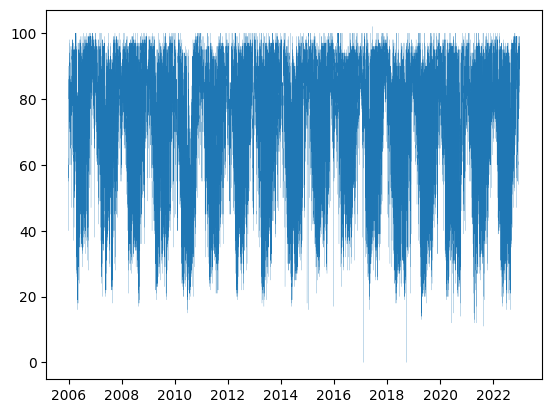

In [112]:
plt.plot(sub_Time_U['Date'], sub_Time_U['Humidity'], linewidth = 0.1)

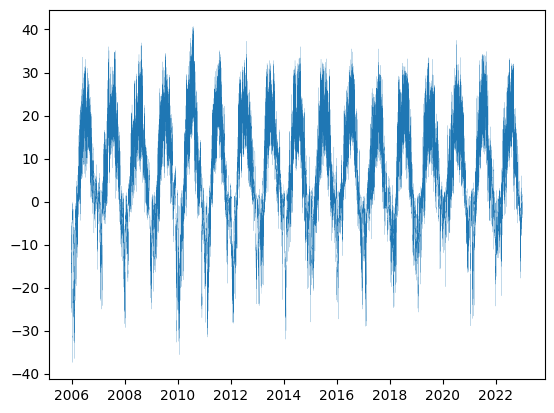

In [113]:
plt.plot(sub_Time_T['Date'], sub_Time_T['Temperature'], linewidth = 0.1)

Text(0.5, 1.0, 'Ветер, дующий с запада')

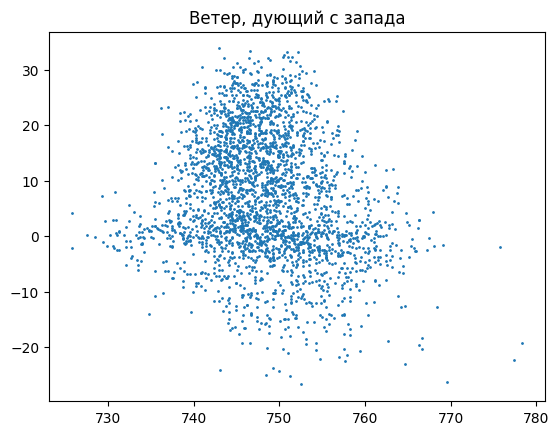

In [114]:
sub = df.loc[:,['T', 'Po']][df['DD'] == df['DD'].unique()[1]].dropna()
plt.scatter(sub['Po'], sub['T'], s=1)
plt.title(df['DD'].unique()[1])

In [115]:
pd.pivot_table(df,
    values='T',
    index= 'DD',
    columns='Cm',
    aggfunc=np.mean
)

Cm,Высококучевые башенкообразные или хлопьевидные.,"Высококучевые просвечивающие, полосами, либо один или несколько слоев высококучевых просвечивающих, распространяющихся по небу; эти высококучевые в целом уплотняются.","Высококучевые просвечивающие, расположенные на одном уровне.","Высококучевые, образовавшиеся из кучевых (или кучево-дождевых).","Высококучевые, просвечивающие или плотные в двух или более слоях или высококучевые плотные в одном слое, не распространяющиеся но небу, либо высококучевые с высокослоистыми или слоисто-дождевыми.","Высококучевых, высокослоистых или слоисто-дождевых облаков нет.",Высокослоистые непросвечивающие или слоисто-дождевые.,Высокослоистые просвечивающие.,"Клочья (часто чечевицеобразные) высококучевых просвечивающих, непрерывно изменяющихся; расположены на одном или более уровнях."
DD,,,,,,,,,
"Ветер, дующий с востока",-0.446154,10.384615,14.513732,0.400000,11.660870,15.180535,-3.129677,-6.412821,NaN
"Ветер, дующий с востоко-северо-востока",3.158537,13.600000,13.910903,NaN,18.350000,17.744444,-3.315714,-7.675000,NaN
"Ветер, дующий с востоко-юго-востока",0.677647,0.811111,11.771593,11.925000,9.100000,10.826367,-4.028141,-4.872340,NaN
"Ветер, дующий с запада",2.331159,4.613333,8.875189,-0.720000,9.176923,11.539976,-3.834579,-1.542857,NaN
"Ветер, дующий с западо-северо-запада",2.717814,4.037500,8.533556,1.733333,13.670000,11.421997,-3.268750,-9.325532,NaN
"Ветер, дующий с западо-юго-запада",3.450303,7.080000,9.649286,10.566667,8.752941,11.692688,-1.307207,-2.190000,-5.05
"Ветер, дующий с севера",4.049721,7.016667,12.284606,12.300000,9.957895,15.192109,-3.281879,-4.794340,2.60
"Ветер, дующий с северо-востока",4.177885,20.750000,13.998525,NaN,19.400000,15.560317,-4.194915,-5.516216,NaN
"Ветер, дующий с северо-запада",3.656716,5.614286,8.401373,22.200000,8.177778,11.031839,-2.729167,-6.959524,NaN


In [116]:
day_mean = np.array(0)

In [117]:
day = df['T'][()]

array([datetime.date(2022, 12, 31), datetime.date(2022, 12, 30),
       datetime.date(2022, 12, 29), ..., datetime.date(2006, 1, 3),
       datetime.date(2006, 1, 2), datetime.date(2006, 1, 1)], dtype=object)